In [1]:
#import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.lines import Line2D

In [2]:
df = pd.read_excel("IPL.xlsx")

In [3]:
df

,Team,PP,MO,DO,BPP,BMO,BDO,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,Lucknow Super Giants,22.2,88.8,77.7,55.5,88.8,88.8,NaN,NaN,NaN,NaN
1,Rajasthan Royals,77.7,77.7,100.0,88.8,11.1,77.7,NaN,NaN,NaN,NaN
2,Delhi Capitals,88.8,10.0,33.3,11.1,66.6,88.8,NaN,NaN,NaN,NaN
3,Gujarat Titans,66.6,22.2,88.8,100.0,10.0,44.4,NaN,NaN,NaN,NaN
4,Kolkata Knight Riders,33.3,100.0,10.0,22.2,66.6,33.3,NaN,NaN,NaN,NaN
5,Mumbai Indians,44.4,11.1,44.4,55.5,11.1,55.5,NaN,NaN,NaN,NaN
6,Royal Challengers Bangalore,10.0,44.4,66.6,10.0,100.0,10.0,NaN,NaN,NaN,NaN
7,Sunrisers Hyderabad,11.1,66.6,22.2,33.3,11.1,55.5,NaN,NaN,NaN,NaN
8,Chennai Super Kings,55.5,55.5,55.5,33.3,55.5,10.0,NaN,NaN,NaN,NaN
9,Punjab Kings,88.8,33.3,11.1,55.5,11.1,22.2,NaN,NaN,NaN,NaN


In [4]:
df.drop(['Unnamed: 7'], axis=1, inplace=True)
df.drop(['Unnamed: 8'], axis=1, inplace=True)
df.drop(['Unnamed: 9'], axis=1, inplace=True)
df.drop(['Unnamed: 10'], axis=1, inplace=True)

In [5]:
power_df = df.iloc[:,1:7].transpose()

In [6]:
power_df.columns = df['Team'].sort_index().values

In [7]:
power_df

,Lucknow Super Giants,Rajasthan Royals,Delhi Capitals,Gujarat Titans,Kolkata Knight Riders,Mumbai Indians,Royal Challengers Bangalore,Sunrisers Hyderabad,Chennai Super Kings,Punjab Kings
PP,22.2,77.7,88.8,66.6,33.3,44.4,10.0,11.1,55.5,88.8
MO,88.8,77.7,10.0,22.2,100.0,11.1,44.4,66.6,55.5,33.3
DO,77.7,100.0,33.3,88.8,10.0,44.4,66.6,22.2,55.5,11.1
BPP,55.5,88.8,11.1,100.0,22.2,55.5,10.0,33.3,33.3,55.5
BMO,88.8,11.1,66.6,10.0,66.6,11.1,100.0,11.1,55.5,11.1
BDO,88.8,77.7,88.8,44.4,33.3,55.5,10.0,55.5,10.0,22.2


findfont: Font family ['Trebushet MS'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Trebushet MS'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Trebushet MS'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Trebushet MS'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Trebushet MS'] not found. Falling back to DejaVu Sans.


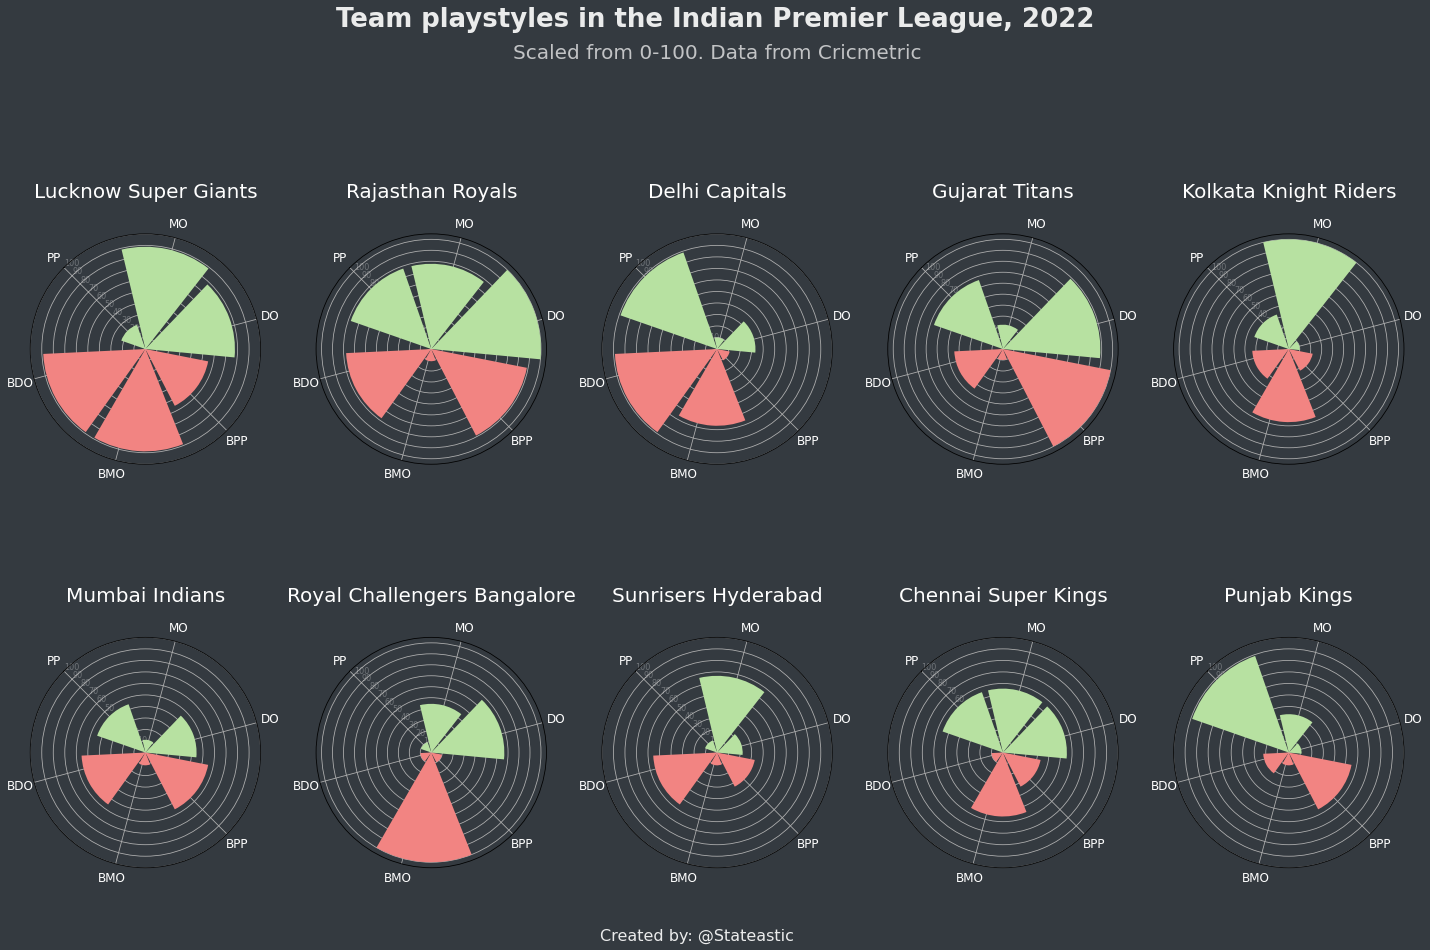

In [8]:
#set the figure size
fig = plt.figure(figsize=(20,18))

#Create a Grid of 2 Rows and 5 Columns
gs = gridspec.GridSpec(2,5, width_ratios=[1,1,1,1,1])

#set the fig colour
fig.patch.set_facecolor('#343a40')

#create a polar bar chart as per gridspec
for i in range(0,10):
    ax = plt.subplot(gs[i], polar=True, zorder = 1, facecolor='#343a40', alpha = 0.5)
    ax.set_title(df['Team'].iloc[i], fontsize=20, color='white', pad=20)
    ax.set_facecolor('#343a40')
    ax.bar(x = power_df.index, height = power_df[df['Team'].iloc[i]], width=0.9, color=['#b7e1a1', '#b7e1a1', '#b7e1a1', '#f28482', '#f28482', '#f28482'], alpha =1, zorder = 3)
    ax.set_xticks(np.arange(0,2*np.pi, 2*np.pi/6))
    ax.set_xticklabels(power_df.index, fontsize=12, fontname='Trebushet MS', color='white', zorder = 3)
    ax.set_yticks(np.arange(10,110,10))
    ax.set_yticklabels(np.arange(10,110,10), fontsize=8, fontname= 'Trebushet MS', color='white', zorder = 3, alpha = 0.3)
    ax.set_rlabel_position(0)
    ax.set_theta_zero_location('NW')
    ax.set_theta_direction(-1)

#reduce the space between the subplot
plt.subplots_adjust(wspace=.6, hspace=-0.6)

#fit the plot to the figure
fig.tight_layout()

plt.suptitle('Team playstyles in the Indian Premier League, 2022', fontsize=26, color='white', y=.92, x=0.5, fontname='Trebushet MS', weight='bold', alpha=0.9, zorder = 3)

plt.figtext(0.36, 0.88, 'Scaled from 0-100. Data from Cricmetric', fontsize=20, color='white', fontname='Trebushet MS', alpha=0.7, zorder = 3)

plt.figtext(0.42, 0.2, "Created by: @Stateastic", fontsize=16, color='white', fontname='Trebushet MS', alpha=0.9, zorder = 3)

plt.savefig('Gameplay.png', dpi=600, facecolor='#343a40')
